In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
#Defining our dataset
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
print("Number of columns: ", len(df.columns))
print("Number of rows: ", df.shape[0])
print("Target column: ", df.columns[-1])

Number of columns:  15
Number of rows:  32561
Target column:  income


1. Number of columns:  15
2. Number of rows:  32561
3. Target column:  income

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We have the columns in numerical form (continuos)

1. Age - the person's age - the mean is 38

2. Fnlwgt - How many persons with same characteristics there are

3. Education num - education number of years - the mean is 10

4. Capital gain - Profits of a person - mean is 1077

5. Capital loss - loss of a person - mean is 87

6. Hours per week - number of hours they work during a week - the mean is 40 (8h/day)

And columns in categorical form:

7. Workclass - the employment status of a person

8. Education - same as education num - the highest level of study

9. Marital status - if the person is marries or not, and others.

10. Occupation - the field in which they work

11. Relationship - related to marital status, the relationship of the person to others

12. Race - The person's race

13. Native country - where the person is from

14. Income - if the person gains more than 50K per year or not


<AxesSubplot:xlabel='education.num', ylabel='count'>

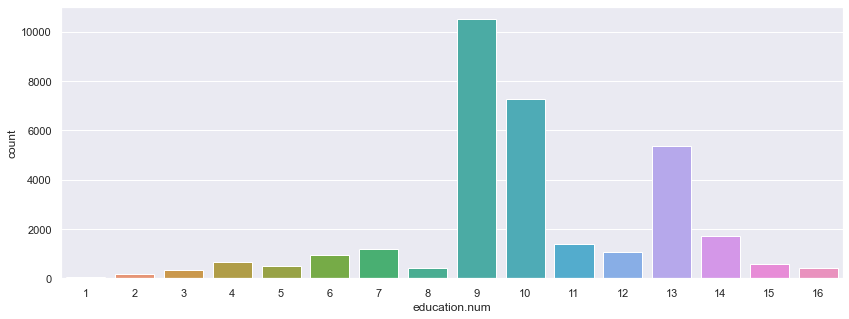

In [7]:
#Analyzing the 'education.num' column with seaborn countplot
sns.set(rc={"figure.figsize":(14, 5)})
sns.countplot(x='education.num',data=df)

This plot shows us the distribution of data for education level.

We can see that most of the persons graduated high-schools or senior schools/middle school. Also a smaller part went to superior studies (above 12 level). 

<AxesSubplot:xlabel='education', ylabel='count'>

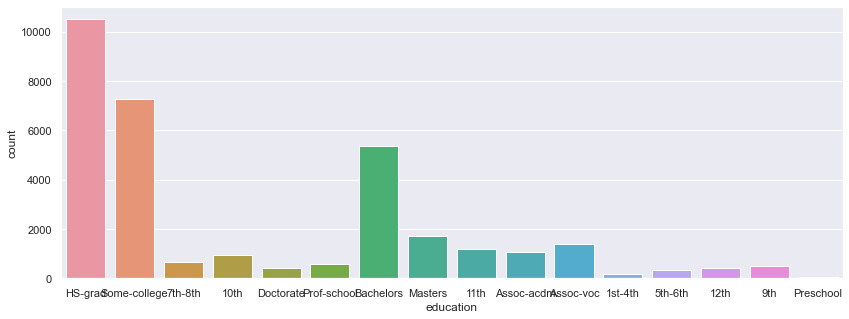

In [8]:
#Analyzing the 'education' column with seaborn countplot
sns.set(rc={"figure.figsize":(14, 5)})
sns.countplot(x='education',data=df)

Education level is, of course, influencing the income of a person. In a lot of the cases a person with a higher study degree will be paid more.

The education column is also presenting the level of education, so I will only choose one of these 2 columns to work with, and it will be probably the education.num column because it is already in numerical form.

It is also important to say that they are very similar - looking at first bar 'HS grad' is the same as 9-10 level of education, and the highest levels 13-14-15 represent the Bachelor, Masters and Doctorate bars from 'education' column. 

<AxesSubplot:xlabel='workclass', ylabel='count'>

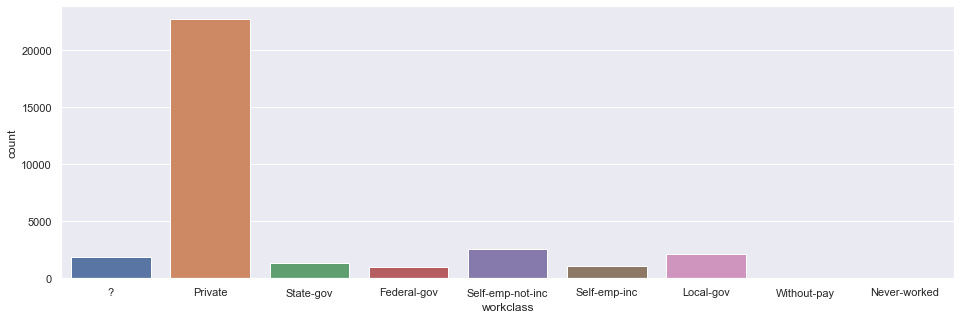

In [9]:
#Analyzing distributuon of 'workclass' column 
sns.set(rc={"figure.figsize":(16, 5)})
sns.countplot(x='workclass',data=df)

We can see that a big part - more exactly 22.5k from the entire dataset of 32.5k persons is working in a private company.

In the data cleaning I will impute the categories with frequency - to represent the Private category with a high frequency rate.

<AxesSubplot:xlabel='marital.status', ylabel='count'>

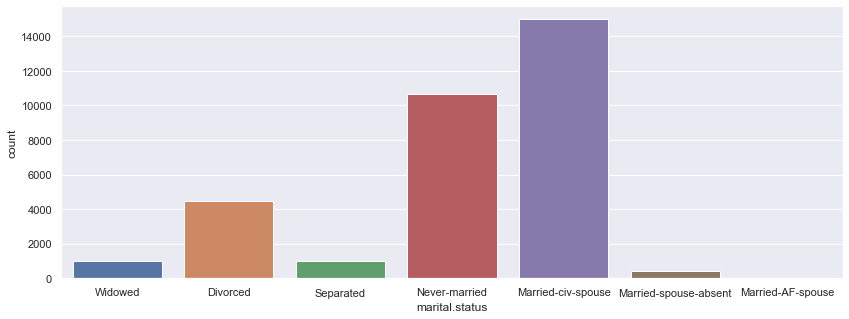

In [10]:
#Analyzing distributuon of 'marital.status' column 
sns.set(rc={"figure.figsize":(14, 5)})
sns.countplot(x='marital.status',data=df)

This 'marital status' column might help us in predicting the income of a person, I will impute the values with frequency

<AxesSubplot:xlabel='relationship', ylabel='count'>

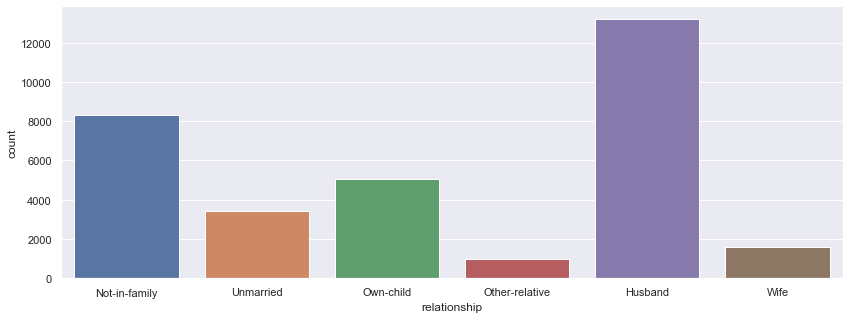

In [11]:
#Analyzing distributuon of 'relationship' column 
sns.set(rc={"figure.figsize":(14, 5)})
sns.countplot(x='relationship',data=df)

This column doesn't give us so much information if to think about their income especially.
A husband/wife can also have a child for example. This column is also linked with the 'marital.status' which would be better to use.

<AxesSubplot:xlabel='occupation', ylabel='count'>

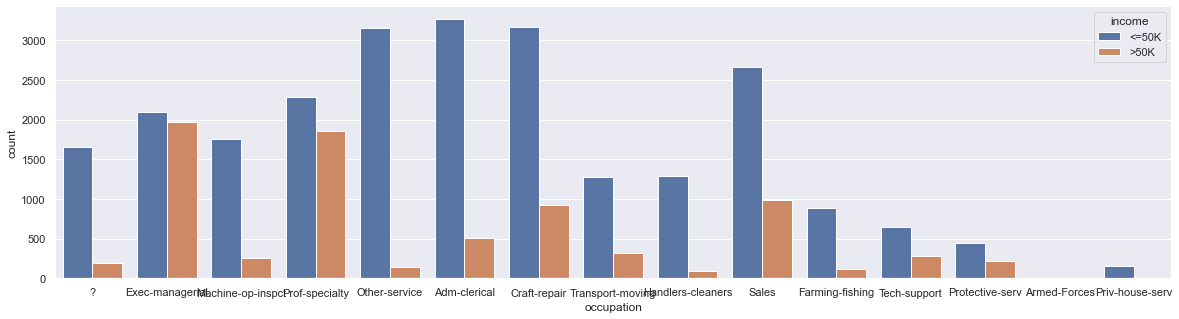

In [12]:
#Analyzing the 'occupation' column with seaborn countplot
sns.set(rc={"figure.figsize":(20, 5)})
sns.countplot(x='occupation',data=df, hue = 'income')

From this plot we extract the information taht Executive managers, Prof-speciality and also Sales tend to have a higher possibility of gaining a high income than other occupations.

<AxesSubplot:xlabel='sex', ylabel='age'>

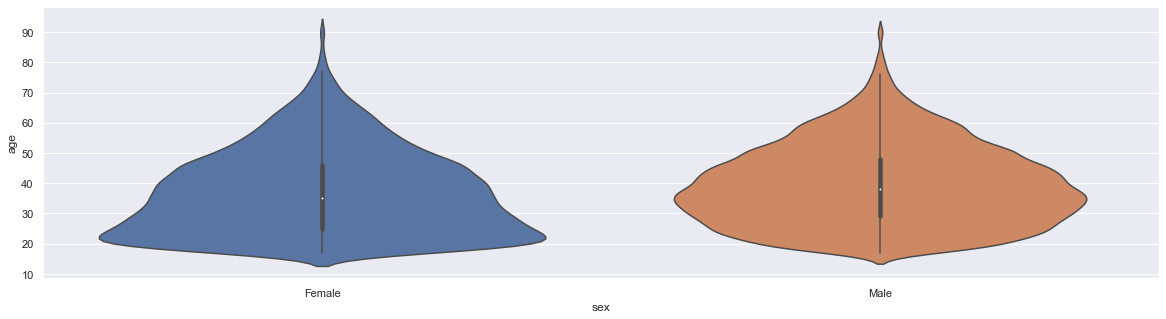

In [13]:
#Analyzing 'age' and 'sex' column together
sns.violinplot(y = df['age'], x = df['sex'])

In this plot we analyzed two columns at the same time - 'sex' and 'age'. We can see we have more females at the age 20-25, while males 30-40 (the mean). 
In general, the age column can be explained as following: being experienced and good in what you are doing (and thus getting paid more) comes with time. But not necessarily, of course.

Gender may also be a factor of an increased income.
We will do some research now.


<AxesSubplot:xlabel='income', ylabel='count'>

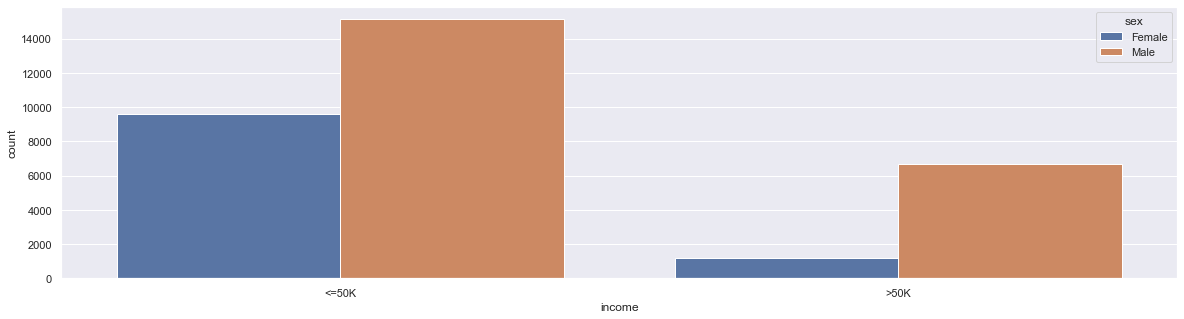

In [14]:
#Analayzing the income in relation with gender of a person
sns.countplot( x = 'income', data=df, hue = 'sex')

I will calculate to see the exact differece between a man and woman chance of haing high income

In [15]:
#Creating a dummy variable for the 'income' and 'sex' column
df = pd.get_dummies(df, columns=['income', 'sex'], drop_first = False)

In [16]:
#Counting how many females/males have a high income
df.groupby('income_>50K').sum()[['sex_Female', 'sex_Male']]

,sex_Female,sex_Male
income_>50K,,
0,9592.0,15128.0
1,1179.0,6662.0


In [17]:
print("Procent of females with high income: " + str(math.trunc(1179/(1179+9592)*100)) + "%")
print("Procent of males with high income: " + str(math.trunc(6662/(6662+15128)*100)) + "%")

Procent of females with high income: 10%
Procent of males with high income: 30%


1. Procent of females with high income: 10%
2. Procent of males with high income: 30%

A man has a higher chance of having a increased income than a woman.

<AxesSubplot:xlabel='race', ylabel='count'>

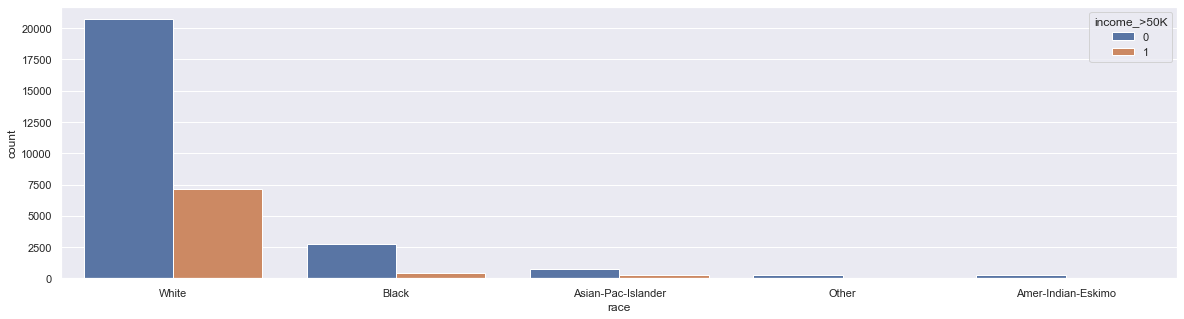

In [18]:
#Analayzing the income in relation with gender of a person
sns.countplot( x = 'race', data=df, hue = 'income_>50K')

I'll do the same thing for races to understand it better.

In [19]:
#Creating a dummy variable for the 'race' column
race_df = pd.get_dummies(df, columns=['race'], drop_first = False)

In [20]:
#Counting how many females/males have a high income
race_df = race_df.groupby('income_>50K').sum()[['race_White', 'race_Black', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Other']]
race_df

,race_White,race_Black,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Other
income_>50K,,,,,
0,20699.0,2737.0,275.0,763.0,246.0
1,7117.0,387.0,36.0,276.0,25.0


In [21]:
#We are interested only in two results:
print("Procent of white persons with high income: " + str(math.trunc(7117/(7117+20699)*100)) + "%")
print("Procent of black persons with high income: " + str(math.trunc(387/(387+2737)*100)) + "%")

Procent of white persons with high income: 25%
Procent of black persons with high income: 12%


1. Procent of white persons with high income: 25%
2. Procent of black persons with high income: 12%

Conclusions:
A white person has an increased rate with 13% than a black one, to have a high income


In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income_<=50K,income_>50K,sex_Female,sex_Male
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,0,4356,40,United-States,1,0,1,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,United-States,1,0,1,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,0,4356,40,United-States,1,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,United-States,1,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,3900,40,United-States,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,40,United-States,1,0,0,1
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,1,0,1,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,0,1,0,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,1,0,1,0


<AxesSubplot:xlabel='income_>50K', ylabel='hours.per.week'>

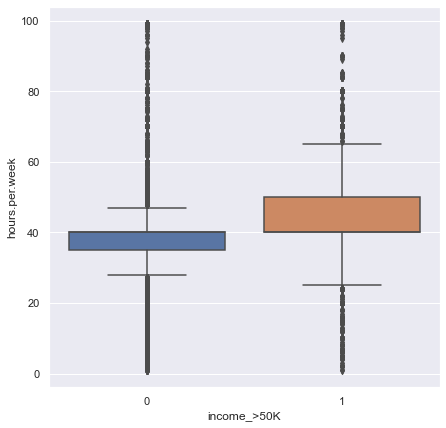

In [25]:
#Analayzing the income in relation with hours per week column
sns.set(rc={"figure.figsize":(7, 7)})
sns.boxplot(x='income_>50K',y='hours.per.week',data=df)

We can see that persons with high income (>50K) are working more than 40 hours per week - which is 8h/day and it means the person has a stable job.

<AxesSubplot:>

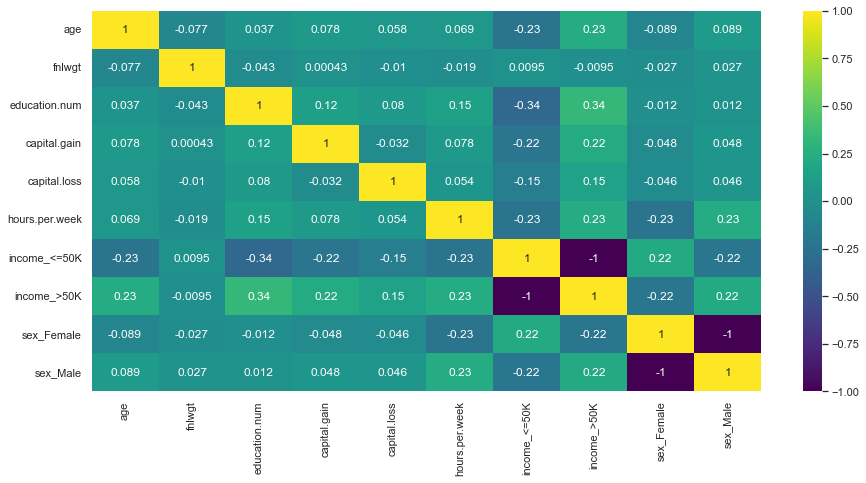

In [27]:
#Correlation table
sns.set(rc={"figure.figsize":(15, 7)})
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

We see a postive correlation with high income and age, this comfirms our statement from before.

Also we can see a 0.34 correlation between education level and high income that also confirms our hypothesis.

Males tend to work a little bit more - 0.23 correlation, and vice versa with females.

Low income and females have a positive correlation - 0.22 that reflects those 20 %

We also have the final weight column, that doesn't have a big correlation with target column, it won't be needed because it represents how many other people there are with the same description.

Now we wanna see:
    
1. How does age influence the probability of getting more than 50K/year?

2. Does a higher study degree bring you more money?

3. Is working more = with being payed more?

4. Does the gender influence the income?

### At the moment, with all the information I got, I'd say that the most important columns are 'age', 'workclass', 'education.num', 'marital.status', 'race', 'sex', 'capital.gain', 'hours.per.week' and maybe 'occupation' and 'workclass'.